

# Model selection

## Download

- [Slides](http://www.stanford.edu/class/stats191/Chapter12/Model_selection.html)

- RStudio: [RMarkdown](http://www.stanford.edu/class/stats191/Chapter12/Model_selection.Rmd),[Quarto](http://www.stanford.edu/class/stats191/Chapter12/Model_selection.qmd)    
    
- [Jupyter](https://nbviewer.org/urls/www.stanford.edu/class/stats191/Chapter12/Model_selection.ipynb)    
    


## Outline

- Case studies:

    A. SAT scores by state

    B. Deeper dive into sex discrimination in base salary

- Model selection

- Best subsets 

- Stepwise methods

## Case study A: State SAT scores

- Predicting average 1982 SAT score by state.

- Features:

    1. `Takers` (percentage)

    2. `Income` (parental income of SAT takers)

    3. `Years` (years of education in key subjects)

    4. `Public` (percent of takers in public high school)

    5. `Expend` (state expenditure on high schools per student)

    6. `Rank` (average percentile of students writing SAT 

## SAT data

In [1]:
url = 'https://raw.githubusercontent.com/StanfordStatistics/stats191-data/main/Sleuth3/state_SAT.csv'
SAT.df = read.csv(url, sep=',', row.names=1, header=TRUE)
head(SAT.df)

SAT  Takers Income Years Public Expend Rank
Iowa        1088 3      326    16.79 87.8   25.60  89.7
SouthDakota 1075 2      264    16.07 86.2   19.95  90.6
NorthDakota 1068 3      317    16.57 88.3   20.62  89.8
Kansas      1045 5      338    16.30 83.9   27.14  86.3
Nebraska    1045 5      293    17.25 83.6   21.05  88.5
Montana     1033 8      263    15.91 93.7   29.48  86.4

##  Case study B: Sex discrimination in employment

- Same data as earlier, with additional features:

    1. `Age` (years)

    2. `Educ` (years)

    3. `Exper` (months)

    4. `Senior` (months)       	       

    5. `Sal77` (salary in 1977 -- used for a different analysis in the book)

## Salary data

In [2]:
url = 'https://raw.githubusercontent.com/StanfordStatistics/stats191-data/main/Sleuth3/discrim_employment.csv'
salary = read.table(url, sep=',', header=TRUE)
head(salary)

Bsal Sal77 Sex  Senior Age Educ Exper
1 5040 12420 Male 96     329 15   14.0 
2 6300 12060 Male 82     357 15   72.0 
3 6000 15120 Male 67     315 15   35.5 
4 6000 16320 Male 97     354 12   24.0 
5 6000 12300 Male 66     351 12   56.0 
6 6840 10380 Male 92     374 15   41.5

## Model selection

- In a given regression situation, there are often many choices to
be made. Recall our usual setup (with intercept)

\begin{equation}
Y_{n \times 1} = X_{n \times (p+1)} \beta_{(p+1) \times 1} + \epsilon_{n \times 1}.
\end{equation}

- Any *subset $A \subset \{1, \dots, p\}$* yields a new regression model

\begin{equation}
{\cal M}(A): Y_{n \times 1} = X[,A] \beta[A] + \epsilon_{n \times 1}
\end{equation}


## Why model selection?

### Possible goals in the `SAT` data

- States with low `Takers` typically have high `Rank`

- Beyond this effect, what is important for understanding variability in SAT scores?

- Maybe want a *parsimonious* model.


## General problem & goals

- When we have many predictors (with many possible interactions), it can be difficult to formulate a good model from outside considerations.

- Which main effects do we include?

- Which interactions do we include?

- Model selection procedures try to *simplify / automate* this task.

## General comments

- This is generally an "unsolved" problem in statistics: there are no
  magic procedures to get you the "best model" or "correct model".

- **Inference after selection is full of pitfalls!** 


## General approach

- To "implement" a model selection procedure, we first need a **criterion / score /  benchmark** to compare two models.

-  Given a criterion, we also need a **search strategy**.

### Search strategies

- **Exhaustive:** With a limited number of predictors, it is possible to search all possible models.

- **Sequential:** Select a model in a sequence of steps.

## Exhaustive search (`leaps` in `R`)

### Candidate criteria

- $R^2$: not a good criterion. Always increase with model size $\implies$ "optimum" is to take the biggest model.

- Adjusted $R^2$: better. It "penalized" bigger models. Follows principle of parsimony / Occam’s razor.

- Mallow’s $C_p$ – attempts to estimate a model’s predictive power, i.e. the power to predict a new observation.



## Setup for `leaps`

In [3]:
# you may need to install `leaps` library
# install.packages('leaps', repos='http://cloud.r-project.org')
library(leaps) 

- `leaps` takes a design matrix as argument: throw away the intercept
column or leaps will complain:

In [4]:
SAT.lm = lm(SAT ~ ., SAT.df)
X_SAT = model.matrix(SAT.lm)[,-1]
Y_SAT = SAT.df$SAT

## The problem with `R^2`

In [5]:
SAT.leaps = leaps(X_SAT, Y_SAT, nbest=5, method='r2')
r2_idx = which((SAT.leaps$r2 == max(SAT.leaps$r2)))
best.model.r2 = colnames(X_SAT)[SAT.leaps$which[r2_idx,]]
best.model.r2

[1] "Takers" "Income" "Years"  "Public" "Expend" "Rank"

---

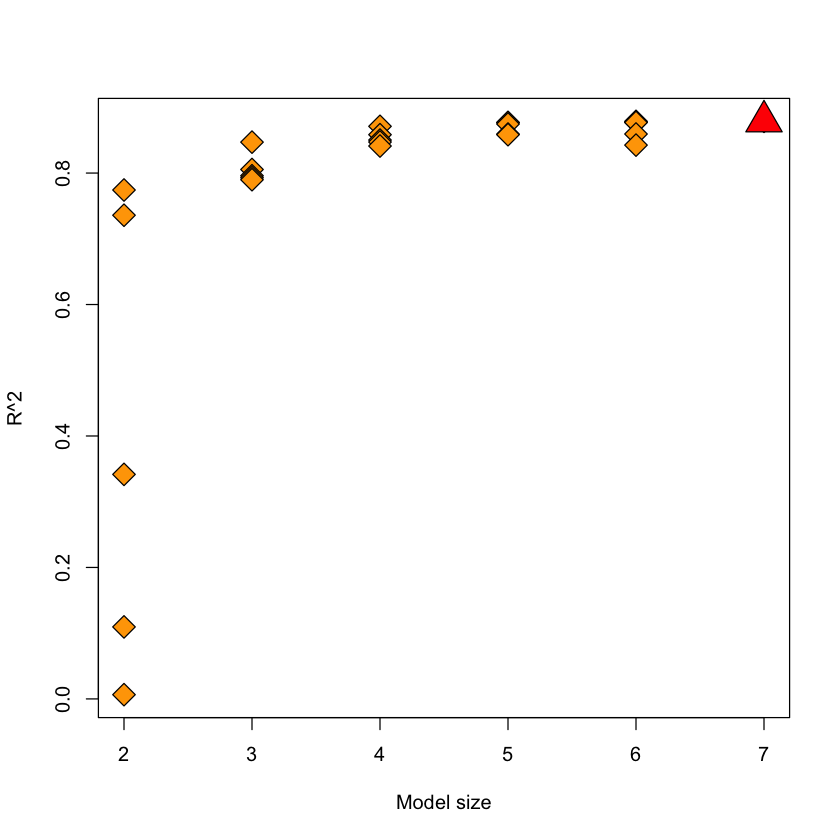

In [6]:
plot(SAT.leaps$size, 
     SAT.leaps$r2, 
     pch=23, 
     bg='orange', 
     cex=2,
     ylab='R^2',
     xlab='Model size')
points(SAT.leaps$size[r2_idx],
       SAT.leaps$r2[r2_idx],
       pch=24,
       bg='red', 
       cex=3)

### Figure

- Plot of $R^2$ of a model as a function of the model size.

- The "best" model in terms of $R^2$ does indeed include all variables. 

## Adjusted $R^2$

-   As we add more and more variables to the model – even random ones,
    $R^2$ will increase to 1.

-   Recall that adjusted $R^2$ tries to take this into account by replacing sums of squares by *mean squares*

$$R^2_a = 1 - \frac{SSE/(n-p-1)}{SST/(n-1)} = 1 - \frac{MSE}{MST}.$$

In [7]:
SAT.leaps = leaps(X_SAT, Y_SAT, nbest=5, method='adjr2')
adjr2_idx = which((SAT.leaps$adjr2 == max(SAT.leaps$adjr2)))
best.model.adjr2 = colnames(X_SAT)[SAT.leaps$which[adjr2_idx,]]
best.model.adjr2

[1] "Years"  "Public" "Expend" "Rank"

---

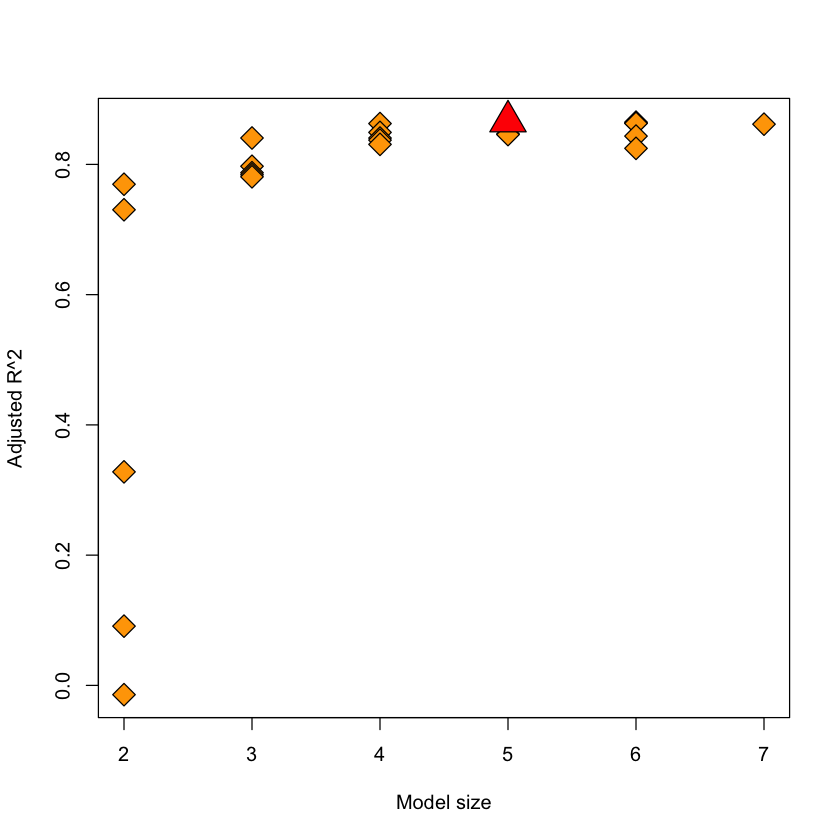

In [8]:
plot(SAT.leaps$size, 
     SAT.leaps$adjr2, 
     pch=23, bg='orange', 
     cex=2,
     ylab='Adjusted R^2',
     xlab='Model size')
points(SAT.leaps$size[adjr2_idx],
       SAT.leaps$adjr2[adjr2_idx],
       pch=24, bg='red', cex=3)

### Figure

- Plot of $R^2_a$ of a model as a function of the model size.

- The "best" model in terms of $R^2_a$ is not the  full model: has size 5 (4 variables plus intercept)

## Mallow’s $C_p$

### Definition:

$$C_p({\cal M}) = \frac{SSE({\cal M})}{\widehat{\sigma}^2} + 2 \cdot p({\cal M}) - n.$$

### Notes:

- $\widehat{\sigma}^2=SSE(F)/df_F$ is the "best" estimate of $\sigma^2$ we have (use the fullest model), i.e. in the `SAT` data it uses all 6 main effects.

- $SSE({\cal M})$ is the $SSE$ of the model ${\cal M}$.

- $p({\cal M})$ is the number of predictors in ${\cal M}$.

- This is an estimate of the expected mean-squared error of $\widehat{Y}({\cal M})$, it takes *bias* and *variance* into account.

---

In [9]:
SAT.leaps = leaps(X_SAT, Y_SAT, nbest=3, method='Cp')
Cp_idx = which((SAT.leaps$Cp == min(SAT.leaps$Cp)))
best.model.Cp = colnames(X_SAT)[SAT.leaps$which[Cp_idx,]]
best.model.Cp

[1] "Years"  "Public" "Expend" "Rank"

---

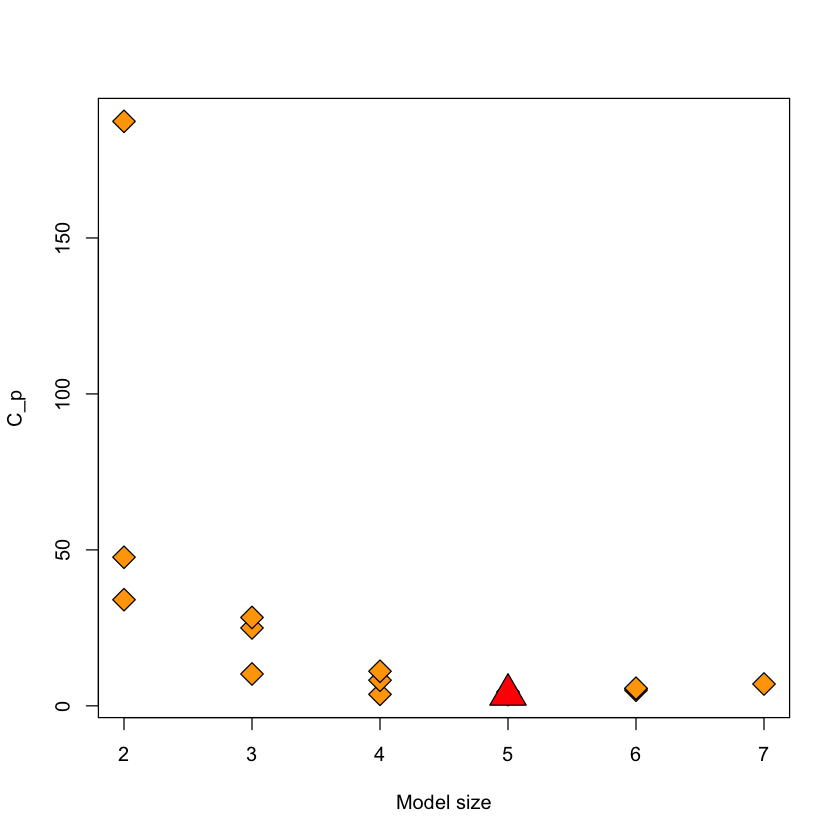

In [10]:
plot(SAT.leaps$size,
     SAT.leaps$Cp,
     pch=23,
     bg='orange',
     cex=2,
     ylab='C_p',
     xlab='Model size')
points(SAT.leaps$size[Cp_idx],
       SAT.leaps$Cp[Cp_idx],
       pch=24, 
       bg='red', 
       cex=3)

### Figure

- Plot of $C_p$ of a model as a function of the model size.

- The "best" model in terms of $C_p$ is not the full model: has size 5 (4 variables plus intercept)

- Agrees with `R^2_a`.

## Sequential search (`step` in `R`)

- The `step` function uses a specific score for comparing models.

### Akaike Information Criterion (AIC)

$$AIC({\cal M}) = - 2 \log L({\cal M}) + 2 \cdot p({\cal M})$$

- Above, $L({\cal M})$ is the maximized likelihood of the model.

### Bayesian Information Criterion (BIC)

$$BIC({\cal M}) = - 2 \log L({\cal M}) + \log n \cdot p({\cal M})$$

- Note: AIC/BIC be used for whenever we have a likelihood, so this generalizes to many statistical models.

## AIC for regression

- In linear regression with unknown $\sigma^2$

$$-2 \log L({\cal M}) = n \log(2\pi \widehat{\sigma}^2_{MLE}) + n$$

- In linear regression with known $\sigma^2$

$$-2 \log L({\cal M}) = \frac{1}{\sigma^2} SSE({\cal M})$$

- AIC is very much like Mallow’s $C_p$ with known variance.

In [11]:
n = nrow(X_SAT)
p = length(coef(SAT.lm)) + 1
c(n * log(2*pi*sum(resid(SAT.lm)^2)/n) + n + 2*p, AIC(SAT.lm))

[1] 477.477 477.477

## Properties of AIC / BIC

- BIC will typically choose a model as small or smaller than AIC (if using the same search direction).

- As our sample size grows, under some assumptions,
it can be shown that
     1. AIC will (asymptotically) always choose a model that contains the true model, i.e. it won’t leave any variables out.
     2.  BIC will (asymptotically) choose exactly the right model.

## SAT example

Let's take a look at `step` in action. Probably the simplest strategy
is *forward stepwise* which tries to add one variable at a time, as
long as it can find a resulting model whose AIC is better than its
current position.

When it can make no further additions, it terminates.

In [12]:
SAT.step.forward = step(lm(SAT ~ 1, SAT.df), 
                        list(upper = SAT.lm),
                        direction='forward', 
                        trace=FALSE)
names(coef(SAT.step.forward))[-1]

[1] "Rank"   "Years"  "Expend" "Public"

## Interactions and hierarchy

- Wildcard: `.` denotes any variable in `SAT.df` except `SAT`

- `.^2` denotes all 2-way interactions

In [13]:
SAT2.lm = lm(SAT ~ .^2, SAT.df)
SAT2.step.forward = step(lm(SAT ~ 1, SAT.df), 
                        list(upper = SAT2.lm),
                        direction='forward', 
                        trace=FALSE)
names(coef(SAT2.step.forward))[-1]

[1] "Rank"         "Years"        "Expend"       "Public"       "Years:Expend"
[6] "Years:Public" "Rank:Public"

- **Note:** when looking at `trace=TRUE` we see that `step` does not include an interaction unless both main effects are already in the model.



## BIC example

The only difference between AIC and BIC is the price paid per
variable. This is the argument `k` to `step`. By default `k=2` and for
BIC we set `k=log(n)`. If we set `k=0` it will always add variables.

In [14]:
SAT.step.forward.BIC = step(lm(SAT ~ 1, SAT.df), 
                            list(upper=SAT.lm),
                            direction='forward', 
                            k=log(nrow(SAT.df)),
                            trace=FALSE)
names(coef(SAT.step.forward.BIC))[-1]

[1] "Rank"   "Years"  "Expend"

### Compare to AIC

In [15]:
names(coef(SAT.step.forward))[-1]

[1] "Rank"   "Years"  "Expend" "Public"

## Backward selection

Just for fun, let's consider backwards stepwise. This starts at a full
model and tries to delete variables.

There is also a `direction="both"` option.

In [16]:
SAT.step.backward = step(lm(SAT ~ ., SAT.df), 
                        list(lower = ~ 1),
                        direction='backward', 
                        trace=FALSE)
names(coef(SAT.step.backward))[-1]

[1] "Years"  "Public" "Expend" "Rank"

### Compare to `forward`

In [17]:
names(coef(SAT.step.forward))[-1]

[1] "Rank"   "Years"  "Expend" "Public"

## Summarizing results

The model selected depends on the criterion used.

Criterion | Model
--- | ---
$R^2$ | ~ `.`
$R^2_a$ | ~ `Years + Public + Expend + Rank `
$C_p$ | ~ `Years + Public + Expend + Rank `
AIC forward | ~ `Years + Public + Expend + Rank `
BIC forward | ~ `Years + Expend + Rank `
AIC forward `.^2` | ~ `Years + Public + Expend + Rank + Years:Expend + Years:Public + Rank:Public`

**The selected model is random and depends on which method we use!**

**Pretty stable for this analysis.**

## Where we are so far

- Many other "criteria" have been proposed: cross-validation (CV) a very popular criterion.

- Some work well for some types of data, others for different data.

- Check diagnostics!

- These criteria (except cross-validation) are not "direct measures" of predictive power, though Mallow’s $C_p$ is a step in this direction.

- $C_p$ measures the quality of a model based on both *bias* and *variance* of the model. Why is this important?

- *Bias-variance* tradeoff is ubiquitous in statistics!

## Case study B: sex discrimination

### Possible goals in the `salary` data

- Interested in the effect of `Sex` but there could lots of other covariates we might adjust for...

- Considering all second order effects (besides `Sex`) in salary: $2^{14}$ models!

- Remove confounders, reduce variability of `Sex` effect.

### Approach

1. Fit a model without `Sex` using a model selection technique.

2. Estimate the effect of `Sex` by adding it to this model.

**How are we going to choose $2^{14}$ possible choices!**

---

In [18]:
D = with(salary, cbind(Senior, Age, Educ, Exper))
base.lm = lm(Bsal ~ poly(D, 2), data=salary)
summary(base.lm)$coef

Estimate    Std. Error t value    Pr(>|t|)    
(Intercept)         5582.2150   248.1313 22.4970203 7.638697e-36
poly(D, 2)1.0.0.0  -1573.9454   604.3710 -2.6042704 1.101964e-02
poly(D, 2)2.0.0.0   -557.6906   598.3874 -0.9319892 3.542180e-01
poly(D, 2)0.1.0.0  -3296.2869  1205.0112 -2.7354823 7.708189e-03
poly(D, 2)1.1.0.0  -1391.7057 10662.3569 -0.1305252 8.964870e-01
poly(D, 2)0.2.0.0    642.9167  1481.8206  0.4338695 6.655809e-01
poly(D, 2)0.0.1.0   2803.3752   624.6501  4.4879128 2.448263e-05
poly(D, 2)1.0.1.0  -8988.2242  5831.5630 -1.5413062 1.272897e-01
poly(D, 2)0.1.1.0 -13458.5332 10422.6307 -1.2912799 2.004204e-01
poly(D, 2)0.0.2.0    511.2407   617.2702  0.8282284 4.100682e-01
poly(D, 2)0.0.0.1   5148.9154  2440.3756  2.1098865 3.807450e-02
poly(D, 2)1.0.0.1   3111.7689 11658.6746  0.2669059 7.902460e-01
poly(D, 2)0.1.0.1 -22769.0399 27351.7731 -0.8324521 4.076954e-01
poly(D, 2)0.0.1.1  -5858.7426  9012.8843 -0.6500408 5.175758e-01
poly(D, 2)0.0.0.2   -671.2631  1646.9549 -0.4075783 6.846998e-01

## Best second order model using $C_p$ with `leaps`

In [19]:
X_sal = model.matrix(base.lm)[,-1]
Y_sal = log(salary$Bsal)
salary.leaps = leaps(X_sal, Y_sal, nbest=10, method='Cp')
Cp_idx = which((salary.leaps$Cp == min(salary.leaps$Cp)))
best.model.Cp = salary.leaps$which[Cp_idx,]
colnames(X_sal)[best.model.Cp]

[1] "poly(D, 2)1.0.0.0" "poly(D, 2)0.1.0.0" "poly(D, 2)0.0.1.0"
[4] "poly(D, 2)1.0.1.0" "poly(D, 2)0.1.1.0" "poly(D, 2)0.0.0.1"
[7] "poly(D, 2)0.1.0.1"

## Plot of $C_p$ scores (Fig 12.11 in book)

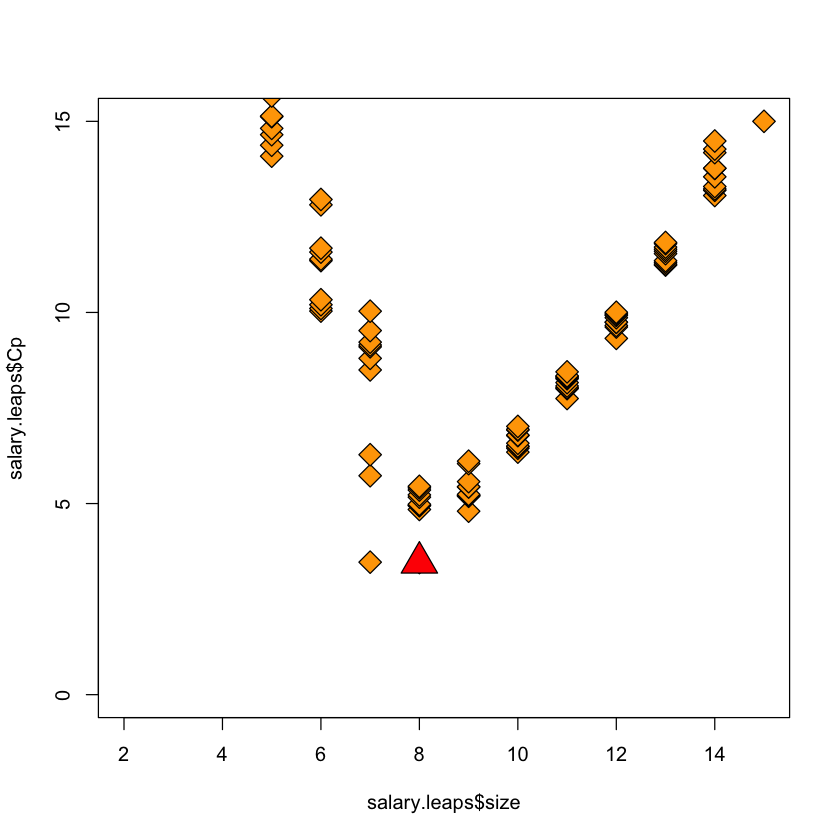

In [20]:
plot(salary.leaps$size,
     salary.leaps$Cp,
     pch=23,
     bg='orange',
     cex=2, 
     ylim=c(0, 15))
points(salary.leaps$size[Cp_idx],
       salary.leaps$Cp[Cp_idx],
       pch=24,
       bg='red',
       cex=3)

### Figure:

- Plot of $C_p$ score as a function of model size.

- Two models are lower than the rest but quite close. These models used in subsequent analysis.

## Estimating the effect of `Sex`

In [21]:
summary(lm(log(Bsal) ~ Sex + X_sal[,best.model.Cp], data=salary))$coef['SexMale',]

Estimate   Std. Error      t value     Pr(>|t|) 
1.173378e-01 2.290937e-02 5.121827e+00 1.896486e-06

- On inspection, book drops one of these interactions:

In [22]:
summary(lm(log(Bsal) ~ Sex + X_sal[,best.model.Cp][,-4], data=salary))$coef['SexMale',]

Estimate   Std. Error      t value     Pr(>|t|) 
1.195901e-01 2.291496e-02 5.218866e+00 1.254967e-06

## What if we used `step`?

In [23]:
step_df = with(salary, data.frame(Bsal, X_sal))
step_lm = lm(log(Bsal) ~ ., step_df)
step_sel = step(lm(log(Bsal) ~ 1, data=step_df),
                list(upper=step_lm),
		trace=FALSE)
names(coef(step_sel))[-1]

[1] "poly.D..2.0.0.1.0" "poly.D..2.1.0.0.0" "poly.D..2.0.1.1.0"
[4] "poly.D..2.0.0.0.1" "poly.D..2.0.1.0.0" "poly.D..2.0.1.0.1"
[7] "poly.D..2.1.0.1.0"

## Larger example

- As $p$ grows, `leaps` will be too slow

- Even `step` can get slow

### HIV resistance

- Resistance of $n=633$ different HIV+ viruses to drug 3TC.

- Features $p=91$ are mutations in a part of the HIV virus, response
is log fold change in vitro.

In [24]:
url_X = 'https://raw.githubusercontent.com/StanfordStatistics/stats191-data/main/NRTI_X.csv'
url_Y = 'https://raw.githubusercontent.com/StanfordStatistics/stats191-data/main/NRTI_Y.txt'
X_HIV = read.table(url_X, header=FALSE, sep=',')
Y_HIV = read.table(url_Y, header=FALSE, sep=',')
Y_HIV = as.matrix(Y_HIV)[,1]
X_HIV = as.matrix(X_HIV)
dim(X_HIV)

[1] 633  91

---

In [25]:
D = data.frame(X_HIV, Y_HIV)
M = lm(Y_HIV ~ ., data=D)
M0 = lm(Y_HIV ~ 1, data=D)
system.time(MF <- step(M0,
                 list(lower=M0,
		      upper=M), 
                 trace=FALSE,
		 direction='both'))
names(coef(MF))

   user  system elapsed 
  0.666   0.034   0.701 

[1] "(Intercept)" "V68"         "V17"         "V19"         "V23"        
 [6] "V54"         "V67"         "V82"         "V32"         "V81"        
[11] "V87"         "V57"         "V41"         "V31"         "V29"        
[16] "V30"         "V70"         "V39"         "V26"         "V69"        
[21] "V40"         "V62"         "V64"         "V80"

---

In [26]:
system.time(MB <- step(M,
                 list(lower=M0,
		      upper=M), 
                 trace=FALSE,
		 direction='both'))
names(coef(MB))		 

   user  system elapsed 
 13.304   0.174  13.477 

[1] "(Intercept)" "V17"         "V19"         "V23"         "V26"        
 [6] "V29"         "V30"         "V31"         "V32"         "V39"        
[11] "V40"         "V41"         "V54"         "V57"         "V62"        
[16] "V64"         "V67"         "V68"         "V69"         "V70"        
[21] "V80"         "V81"         "V82"         "V87"